## Importing Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from random import randint
from time import sleep 
from fake_headers import Headers

## Raising request to access URL

In [2]:
if __name__ == "__main__":
    headers = Headers(os="mac", headers=True).generate()

r = requests.get('https://www.amazon.in/s?k=American+Tourister+Ivy+Polypropylene+68+cms+Black+Hardsided+Check-in+Luggage+%28FO1+%280%29+09+002%29&i=luggage&crid=3C4X56TXGEFR3&sprefix=american+tourister+ivy+polypropylene+68+cms+black+hardsided+check-in+luggage+fo1+0+09+002+%2Cluggage%2C224&ref=nb_sb_noss',
                  headers = headers)
soup = BeautifulSoup(r.text, 'html.parser')

In [3]:
r

<Response [200]>

In [4]:
r.text

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sl

## Finding all required objects on web page

In [5]:
products = soup.find_all('div', {'data-component-type' : 's-search-result'})

In [6]:
products

[<div class="sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 AdHolder sg-col s-widget-spacing-small sg-col-4-of-20" data-asin="B08HJ9RQ3H" data-component-type="s-search-result" data-index="2" data-uuid="87f7e59d-dade-46fb-ae06-01bb7bbbe434"><div class="sg-col-inner"><div cel_widget_id="MAIN-SEARCH_RESULTS-2" class="s-widget-container s-spacing-small s-widget-container-height-small celwidget slot=MAIN template=SEARCH_RESULTS widgetId=search-results_1">
 <div class="rush-component s-expand-height" data-component-props='{"percentageShownToFire":"50","batchable":true,"requiredElementSelector":".s-image:visible","url":"https://unagi-eu.amazon.com/1/events/com.amazon.eel.SponsoredProductsEventTracking.prod?qualifier=1657522905&amp;id=2005185044426917&amp;widgetName=sp_atf&amp;adId=20060074328598&amp;eventType=1&amp;adIndex=0"}' data-component-type="s-impression-logger">
 <div class="rush-component s-featured-result-item s-expand-height" data-component-props='{"presenceCounterName":"sp_del

## Look for web-tags in our soup

In [7]:
records = []
for product in products:
    brand = product.find('span', class_ = 'a-size-base-plus a-color-base').text
    name = product.find('span', class_ = 'a-size-base-plus a-color-base a-text-normal').text
    url = product.find('a', class_ = 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal').get('href')
    records.append((brand + " " + name,url))
    sleep(randint(1,5))


In [8]:
records

[('MOKOBARA Luggage Polycarbonate Hardsided Suitcase Trolley Suitcase for Men and Women (The Check-in Medium Luggage- 68cms, Forest Sunray Limited Edition)',
  '/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_luggage_sr_pg1_1?ie=UTF8&adId=A0344701YIGDYXJL1EPM&url=%2FMOKOBARA-Medium-Polycarbonate-Hardsided-Suitcase%2Fdp%2FB08HJ9RQ3H%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3C4X56TXGEFR3%26keywords%3DAmerican%2BTourister%2BIvy%2BPolypropylene%2B68%2Bcms%2BBlack%2BHardsided%2BCheck-in%2BLuggage%2B%2528FO1%2B%25280%2529%2B09%2B002%2529%26qid%3D1657522905%26s%3Dluggage%26sprefix%3Damerican%2Btourister%2Bivy%2Bpolypropylene%2B68%2Bcms%2Bblack%2Bhardsided%2Bcheck-in%2Bluggage%2Bfo1%2B0%2B09%2B002%2B%252Cluggage%252C224%26sr%3D1-1-spons%26psc%3D1%26smid%3DA2ZJIE4OXD710M&qualifier=1657522905&id=2005185044426917&widgetName=sp_atf'),
 ('American Tourister Ivy Polypropylene 68 cms Black Hardsided Check-in Luggage (FO1 (0) 09 002)',
  '/American-Tourister-Polypropylene-FO1-002/dp/B08CS9NC8Y/ref=sr_1_2?crid=3

In [9]:
len(records)

33

In [10]:
sleep(3.4)
input = soup.find('input', {'aria-label' : 'Search'}).get('value')

In [11]:
input

'American Tourister Ivy Polypropylene 68 cms Black Hardsided Check-in Luggage (FO1 (0) 09 002)'

In [12]:
for list in records:
    for entry in list:
        if input in entry:
            href = list[1]

In [13]:
href

'/American-Tourister-Polypropylene-FO1-002/dp/B08CS9NC8Y/ref=sr_1_2?crid=3C4X56TXGEFR3&keywords=American+Tourister+Ivy+Polypropylene+68+cms+Black+Hardsided+Check-in+Luggage+%28FO1+%280%29+09+002%29&qid=1657522905&s=luggage&sprefix=american+tourister+ivy+polypropylene+68+cms+black+hardsided+check-in+luggage+fo1+0+09+002+%2Cluggage%2C224&sr=1-2'

In [14]:
prod_url = 'https://www.amazon.in' + href

In [15]:
prod_url

'https://www.amazon.in/American-Tourister-Polypropylene-FO1-002/dp/B08CS9NC8Y/ref=sr_1_2?crid=3C4X56TXGEFR3&keywords=American+Tourister+Ivy+Polypropylene+68+cms+Black+Hardsided+Check-in+Luggage+%28FO1+%280%29+09+002%29&qid=1657522905&s=luggage&sprefix=american+tourister+ivy+polypropylene+68+cms+black+hardsided+check-in+luggage+fo1+0+09+002+%2Cluggage%2C224&sr=1-2'

## Redirecting to product page

In [16]:
if __name__ == "__main__":
    headers = Headers(os="mac", headers=True).generate()

req = requests.get(prod_url, headers = headers)

In [17]:
req

<Response [200]>

In [18]:
sleep(10)
soup1 = BeautifulSoup(req.text, 'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.
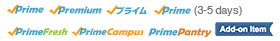
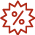

In [19]:
soup1

In [20]:
href_2 = soup1.find('a', {'data-hook' : 'see-all-reviews-link-foot'}).get('href')

In [21]:
href_2

'/American-Tourister-Polypropylene-FO1-002/product-reviews/B08CS9NC8Y/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [22]:
review_url = 'https://www.amazon.in' + href_2

In [23]:
review_url

'https://www.amazon.in/American-Tourister-Polypropylene-FO1-002/product-reviews/B08CS9NC8Y/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

## Redirecting to reviews page

In [24]:
def get_soup(url):
    if __name__ == "__main__":
            headers = Headers(os="mac", headers=True).generate()

    r = requests.get(url, headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [25]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook':'review'})
    for item in reviews:
        review = {
                'product_name' : soup.title.text.replace('Amazon.in:Customer reviews:', '').strip(),    
                'cust_name' : item.find('span', class_ = 'a-profile-name').text.strip(),
                'title' : item.find('a', {'data-hook': 'review-title'}).text.strip(),
                'rating' : float(item.find('i', {'data-hook':'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                'body' : item.find('span', {'data-hook': 'review-body'}).text.strip(),
                'date' : item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on','').strip()
                }
        reviewlist.append(review)

## Looping through all review pages

In [26]:
for x in range(1,999):
    soup = get_soup(review_url + "&pageNumber=" + str(x))
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    sleep(randint(3,10))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
50
Getting page: 6
60
Getting page: 7
70
Getting page: 8
80
Getting page: 9
90
Getting page: 10
100
Getting page: 11
110
Getting page: 12
120
Getting page: 13
130
Getting page: 14
140
Getting page: 15
150
Getting page: 16
160
Getting page: 17
170
Getting page: 18
180
Getting page: 19
190
Getting page: 20
200
Getting page: 21
210
Getting page: 22
220
Getting page: 23
230
Getting page: 24
240
Getting page: 25
250
Getting page: 26
260
Getting page: 27
270
Getting page: 28
280
Getting page: 29
290
Getting page: 30
300
Getting page: 31
310
Getting page: 32
320
Getting page: 33
330
Getting page: 34
340
Getting page: 35
350
Getting page: 36
360
Getting page: 37
370
Getting page: 38
380
Getting page: 39
390
Getting page: 40
400
Getting page: 41
410
Getting page: 42
420
Getting page: 43
430
Getting page: 44
440
Getting page: 45
450
Getting page: 46
460
Getting page: 47
470
Getting page: 48
480
Getting pa

In [27]:
df = pd.DataFrame(reviewlist)
df.head()

,product_name,cust_name,title,rating,body,date
0,American Tourister Ivy Polypropylene 68 cms Bl...,abhikchttrj,Great product. Fast delivery,5.0,The media could not be loaded.\n ...,2 January 2021
1,American Tourister Ivy Polypropylene 68 cms Bl...,rahul giripunje,Good quality bag,5.0,Bag is of good quality polypropylene.Large spa...,31 August 2020
2,American Tourister Ivy Polypropylene 68 cms Bl...,Rahul Kumar Pathak,Satisfied,4.0,I got it for ₹2999. It is a nice and looks gen...,16 September 2020
3,American Tourister Ivy Polypropylene 68 cms Bl...,Mahesh,Product is bad and received used product,1.0,First time Amazon disappointed me with this pr...,27 December 2020
4,American Tourister Ivy Polypropylene 68 cms Bl...,Priyankita,I use American tourister but this one has a de...,2.0,Everything is fine as I have purchased and us...,9 August 2021


In [28]:
df.to_excel('reviews.xlsx')